# Best Neighborhood in Pittsburgh
## By Ao Xue Ding, Jared Glickfield, and Jackson Lustina 

In [1]:
import numpy as mp
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

#### Importing General Files

In [12]:
neighborhood = gpd.read_file("Neighborhoods_.geojson")
neighborhoodCopy = neighborhood.copy()

#### Getting Park data into df

In [13]:
parks = gpd.read_file("jbg53Files/Pittsburgh_Parks.geojson")
parkNum = pd.DataFrame(neighborhood.objectid, columns=['objectid', 'parks'])
for index, n in neighborhood.iterrows():
    numOfParks = 0 
    for index, p in parks.iterrows():
        if n.geometry.intersects(p.geometry):
            numOfParks += 1
    parkNum.at[parkNum[parkNum['objectid'] == n.objectid].index.values[0], 'parks'] = numOfParks

neighborhood.insert(1, 'parks', parkNum.parks)

#### Getting Cases data into df

In [19]:
d3 = pd.read_csv("Covid-19 Analysis/3.csv")
num_cases = d3.groupby("neighborhood_municipality").sum()['cases']

In [18]:
neighborhood['hood'] = neighborhood['hood'] + ' (Pittsburgh)'
neighborhood = neighborhood.merge(num_cases, how='left', left_on='hood', right_on='neighborhood_municipality')

In [21]:
neighborhood['hood'] = neighborhoodCopy['hood']

#### Getting Polling data into df

#### Metric Calculation

Mapping

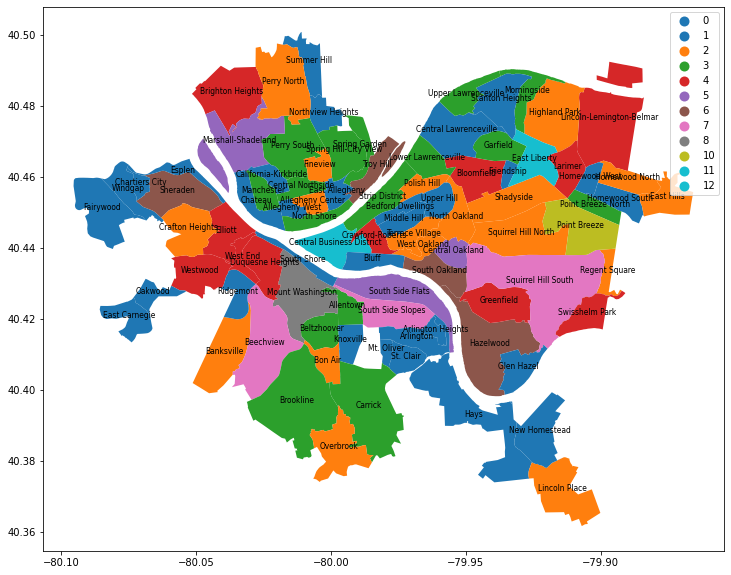

In [22]:
fig, ax = plt.subplots(figsize=(15, 10))

neighborhood['center']= neighborhood.geometry.centroid

neighborhoodPts = neighborhood.copy()
neighborhoodPts.set_geometry("center", inplace = True)

for x, y, label in zip(neighborhoodPts.geometry.x, neighborhoodPts.geometry.y, neighborhood.hood):
    plt.text(x, y, label, fontsize = 7.5, ha = 'center', weight = '525')
    
neighborhood.plot(column='parks', ax=ax, legend=True)

### What is the best?